<a href="https://colab.research.google.com/github/Ayanlola2002/GIS/blob/main/Energy_availablity1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  import geemap, ee
except ModuleNotFoundError:
  if 'google.colab' in str(get_ipython()):
    print("package not found, installing w/ pip in Google Colab...") ## for google collab
    !pip install geemap
  else:
    print("package not found, installing w/ conda...")
    !conda install mamba -c conda-forge -y   ## for your local directory
    !mamba install geemap -c conda-forge -y
    import geemap, ee

In [ ]:
try:
  ee.Initialize()    ## This is done anytime you want to use the google earth engine API.
except Exception as e:
  ee.Authenticate()  ## To help google earth engine link your account
  ee.Initialize()

In [ ]:
# you 1st need to right click on the shared folder and select 'Add to my Drive'
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install -q geopandas


In [ ]:
# 0.5 doesn't support tooltip, must install dev instead
!pip install git+https://github.com/python-visualization/folium

  Cloning https://github.com/python-visualization/folium to /tmp/pip-req-build-_apvtqqs
  Running command git clone -q https://github.com/python-visualization/folium /tmp/pip-req-build-_apvtqqs
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [ ]:
import pandas as pd
import ee
import geemap

import geopandas as gpd

import branca.colormap as cm

import folium
#import rasterio
#import gdal

In [ ]:
# Accessing LGA level polygon boundaries of Nigeria using GIS extracted dataset 
#nig_lga = ee.FeatureCollection("users/ayanmiayan2010/LGA") \
#            .filter(ee.Filter.eq('LGA', 'Nigeria'))

In [ ]:
# Accessing state level polygon boundaries of Nigeria using FAO dataset
nigeria = ee.FeatureCollection("FAO/GAUL/2015/level2") \
            .filter(ee.Filter.eq('ADM0_NAME', 'Nigeria'))

In [ ]:
# Access the solar potential raster image downloaded as asset
pvpotential = ee.Image("users/ayanmiayan2010/PVOUT_NIG")

In [ ]:
# Add reducer output to the Features in the collection.
pvpotential = pvpotential.reduceRegions(
  collection = nigeria,
  reducer = ee.Reducer.mean(),
);

In [ ]:
#Converting the GEE Feature Collection into a pandas dataframe
pvPotentialdf = geemap.ee_to_geopandas(pvpotential)
#pvPotdf = geemap.ee_to_pandas(pvpot)

In [ ]:
pvPotentialdf

geometry  ADM0_CODE ADM0_NAME  \
0    POLYGON ((4.75977 13.29626, 4.76085 13.28700, ...        182   Nigeria   
1    POLYGON ((12.81235 13.43154, 12.81462 13.42666...        182   Nigeria   
2    POLYGON ((13.35680 13.57611, 13.36455 13.55711...        182   Nigeria   
3    POLYGON ((10.20444 13.06766, 10.20877 13.03678...        182   Nigeria   
4    POLYGON ((7.85296 13.10031, 7.85343 13.09930, ...        182   Nigeria   
..                                                 ...        ...       ...   
770  POLYGON ((5.95349 13.25772, 5.95652 13.24321, ...        182   Nigeria   
771  POLYGON ((3.47113 11.44857, 3.50235 11.40327, ...        182   Nigeria   
772  POLYGON ((6.39559 12.72981, 6.39789 12.71916, ...        182   Nigeria   
773  POLYGON ((3.58417 10.27837, 3.58462 10.27514, ...        182   Nigeria   
774  POLYGON ((3.38907 6.41070, 3.38973 6.40838, 3....        182   Nigeria   

     ADM1_CODE ADM1_NAME  ADM2_CODE  ADM2_NAME DISP_AREA  EXP2_YEAR  \
0        65709    Sokoto     190949    Tangaza        NO       3000   
1         2216     Borno     190950     Abadam        NO       3000   
2         2216     Borno     190951  Lake chad        NO       3000   
3         2240      Yobe     190952   Yusufari        NO       3000   
4         2226   Katsina     190953      Mashi        NO       3000   
..         ...       ...        ...        ...       ...        ...   
770      65709    Sokoto     191408        Isa        NO       3000   
771       2227     Kebbi      22886     Bagudo        NO       3000   
772      65710   Zamfara      23103      Zurmi        NO       3000   
773       2231     Niger      22940      Borgu        NO       3000   
774       2230     Lagos      22928    Eti-Osa        NO       3000   

           STATUS  STR2_YEAR  Shape_Area  Shape_Leng      mean  
0    Member State       1999    0.203399    1.915226  4.696233  
1    Member State       1999    0.204833    2.808507  4.751515  
2    Member State       1999    0.439860    4.543677  4.702281  
3    Member State       1999    0.356411    3.409977  4.771416  
4    Member State       1999    0.075656    1.289336  4.803762  
..            ...        ...         ...         ...       ...  
770  Member State       1000    0.173053    2.308026  4.697784  
771  Member State       1000    0.403523    2.967221  4.434699  
772  Member State       1000    0.230798    2.567153  4.707865  
773  Member State       1000    0.851470    5.288074  4.319234  
774  Member State       1000    0.014824    0.851062  3.819987  

[775 rows x 14 columns]

In [ ]:
type(pvPotentialdf)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# Sort the dataframe by PV potential 
statedf=pvPotentialdf[['ADM1_NAME','ADM2_NAME','geometry','mean']]
#statedf.groupby('ADM1_NAME')['mean'].agg('sum')

In [ ]:
statedf

ADM1_NAME  ADM2_NAME                                           geometry  \
0      Sokoto    Tangaza  POLYGON ((4.75977 13.29626, 4.76085 13.28700, ...   
1       Borno     Abadam  POLYGON ((12.81235 13.43154, 12.81462 13.42666...   
2       Borno  Lake chad  POLYGON ((13.35680 13.57611, 13.36455 13.55711...   
3        Yobe   Yusufari  POLYGON ((10.20444 13.06766, 10.20877 13.03678...   
4     Katsina      Mashi  POLYGON ((7.85296 13.10031, 7.85343 13.09930, ...   
..        ...        ...                                                ...   
770    Sokoto        Isa  POLYGON ((5.95349 13.25772, 5.95652 13.24321, ...   
771     Kebbi     Bagudo  POLYGON ((3.47113 11.44857, 3.50235 11.40327, ...   
772   Zamfara      Zurmi  POLYGON ((6.39559 12.72981, 6.39789 12.71916, ...   
773     Niger      Borgu  POLYGON ((3.58417 10.27837, 3.58462 10.27514, ...   
774     Lagos    Eti-Osa  POLYGON ((3.38907 6.41070, 3.38973 6.40838, 3....   

         mean  
0    4.696233  
1    4.751515  
2    4.702281  
3    4.771416  
4    4.803762  
..        ...  
770  4.697784  
771  4.434699  
772  4.707865  
773  4.319234  
774  3.819987  

[775 rows x 4 columns]

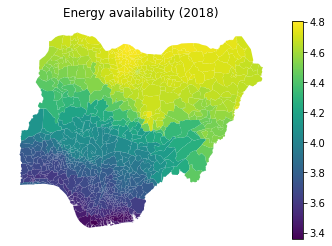

In [ ]:
# high demand areas is in blue

ax=statedf.plot(column='mean',legend=True)
ax.set_title('Energy availability (2018)')
ax.set_axis_off()

In [ ]:
#create a chloropleth
state_gdf = statedf.set_crs(epsg=4326)

In [ ]:
statedf.crs

In [ ]:
#3. Creating interactive choropleth maps with mask.maskFolium
# Estimate centroids of the country
# --------------------
x_map=statedf.centroid.x.mean()
y_map=statedf.centroid.y.mean()
print(x_map,y_map)

7.371211478732366 8.657050758622901


In [ ]:
# Create a map object using Folium
# --------------------
mymap = folium.Map(location=[y_map, x_map], zoom_start=11,tiles='OpenStreetMap')
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(mymap)
mymap

In [ ]:
colormap = cm.linear.YlGnBu_09
colormap

In [ ]:
colormap = cm.linear.YlGnBu_09.to_step(10)
colormap

In [ ]:
colormap = cm.linear.YlGnBu_09.to_step(data=statedf['mean'], method='quant', quantiles=[0,0.1,0.75,0.9,0.98,1])
colormap

In [ ]:
mymap = folium.Map(location=[y_map, x_map], zoom_start=11,tiles=None)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(mymap)
colormap.caption = "Energy Potential"
style_function = lambda x: {"weight":0.5, 
                            'color':'black',
                            'fillColor':colormap(x['properties']['mean']), 
                            'fillOpacity':0.75}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
t_tip=folium.features.GeoJson(
        statedf.set_crs(epsg=4326),
        style_function=style_function,
        control=False,
        highlight_function=highlight_function,
        tooltip=folium.features.GeoJsonTooltip(fields=['ADM1_NAME','ADM2_NAME','mean'],
            aliases=['STATE','LGA','MEAN ENERGY POTENTIAL/LGA'],
            style=("background-color: white; color: #333333; font-family: arial; font-size: 8px; padding: 10px;"),
            sticky=True
        )
    )
colormap.add_to(mymap)
mymap.add_child(t_tip)
mymap

/usr/local/lib/python3.7/dist-packages/folium/features.py:910: UserWarning: GeoJsonTooltip is not configured to render for GeoJson GeometryCollection geometries. Please consider reworking these features: [{'ADM1_NAME': 'Katsina', 'ADM2_NAME': 'Baure', 'mean': 4.756708632901018}, {'ADM1_NAME': 'Kwara', 'ADM2_NAME': 'Baruten', 'mean': 4.105128865481227}] to MultiPolygon for full functionality.
https://tools.ietf.org/html/rfc7946#page-9
  "https://tools.ietf.org/html/rfc7946#page-9".format(self._name, geom_collections), UserWarning)
